<a href="https://colab.research.google.com/github/ElenaBobro/hoom-work2-/blob/main/%22hw_4_4_%D0%92%D1%96%D0%B7%D1%83%D0%B0%D0%BB%D1%96%D0%B7%D0%B0%D1%86%D1%96%D1%8F_%D0%B7_pandas_ipynb%22LB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

У цьому домашньому завданні ми продовжуємо працювати з набором даних `Yulu`, з яким почали працювати в "hw 4.3. Робота з DataFrame. Діаграма розсіювання.". Фокус цього ДЗ в тому, аби будувати візуалізації використовуючи методи pandas.DataFrame. Це дозволяє будувати візуалізації ще швидше.

Документація до тої частини бібліотеки, з якою тут працюємо

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html

### Профіль колонок набору даних:

- **datetime**: дата та час зібрані погодинно
- **season**: сезон (1: весна, 2: літо, 3: осінь, 4: зима)
- **holiday**: чи є день святковим (витягнуто з http://dchr.dc.gov/page/holiday-schedule)
- **workingday**: якщо день не є вихідним або святковим, то позначається як 1, в іншому випадку – 0.
- **weather**:
  1. Ясно, Мало хмарно, частково хмарно
  2. Туман + Хмарно, Туман + Розірвані хмари, Туман + Мало хмарно, Туман
  3. Легкий сніг, Легкий дощ + Гроза + Розсіяні хмари, Легкий дощ + Розсіяні хмари
  4. Сильний дощ + Крижані кулі + Гроза + Туман, Сніг + Туман
- **temp**: температура в градусах Цельсія
- **atemp**: як відчувається температура в градусах Цельсія
- **humidity**: вологість
- **windspeed**: швидкість вітру
- **casual**: кількість неформальних користувачів
- **registered**: кількість зареєстрованих користувачів
- **count**: загальна кількість велосипедів, взятих в оренду, включаючи неформальних та зареєстрованих користувачів

0. Імпортуйте бібліотеки `matplotlib.pyplot` та `pandas`.  Завантажте дані з файла yulu_rental.csv у pandas.DataFrame df.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('/content/drive/MyDrive/file csv/yulu_rental.csv')

1.1. Користуючись групою методів `pandas.plot` побудуйте гістограму кількості зареєстрованих користувачів з налаштуваннями за замовченням (тобто без жодних додаткових параметрів).

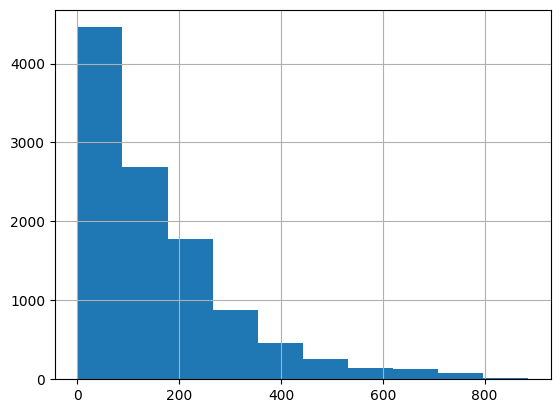

In [3]:
df['registered'].hist();

1.2. Побудуйте гістограму для цього ж показника, але задайте кількість бінів рівну 30 і задайте прозорість 0.5. Додайте підписи за осями ОХ і ОУ, а також назву дівграмі. Опишіть свої спостереження. Що бачите? Чому дані можуть мати такий розподіл?

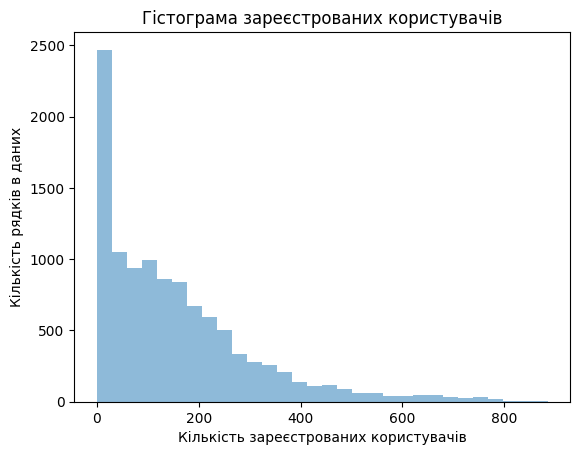

In [4]:
plt.hist(df['registered'], bins=30, alpha=0.5)
plt.xlabel('Кількість зареєстрованих користувачів')
plt.ylabel('Кількість рядків в даних')
plt.title('Гістограма зареєстрованих користувачів')
plt.show()

  Велика кількість даних зосереджена ближче до нуля. Чим більше кількість зареєстрованих користувачів за годину, тим менша кількість рядків у даних. Цей ефект спостерігається приблизно до 800 користувачів. Значення понад 400 користувачів на годину зустрічаються рідко.

  Можливі причини такого розподілу: більшість годин може мати малу кількість реєстрацій, особливо в нічні або малозавантажені періоди.Якщо реєстрації не є рівномірно розподіленими протягом доби, то найчастіше траплятиметься мала кількість нових користувачів за годину, що призводить до такої форми розподілу.



Має вийти щось таке (може бути без сітки):

![](https://drive.google.com/uc?export=view&id=1Pb3UD8cmg_V0LLf8A4feOepTDXMqEAf8)


--------

Перетворимо колонку `datetime` на тип даних `pd.datetime` - це нам доопоможе в подальшій роботі. Просто запустіть колонку нижче і занатуйте собі цей метод роботи з колонкою, в якій міститься дата і час.

In [5]:
df['datetime'] = pd.to_datetime(df.datetime)

І створимо нову колонку `dayofweek` для того, аби дослідити детальніше, коли у нас немає поїздок.

In [6]:
df['dayofweek'] = df.datetime.dt.day_of_week

Переглянемо значення в колонкці. Колонка dayofweek містить числа від 0 до 6 включно, де 0 відповідає понеділку.

In [7]:
df[['datetime','dayofweek']][df.dayofweek==0].head()

,datetime,dayofweek
47,2011-01-03 00:00:00,0
48,2011-01-03 01:00:00,0
49,2011-01-03 04:00:00,0
50,2011-01-03 05:00:00,0
51,2011-01-03 06:00:00,0


2. Проведемо аналіз нульової активності зареєстрованих користувачів за днями тижня. Для цього
  1. Виберіть з набору даних усі записи, де кількість зареєстрованих користувачів дорівнює 0. Групуйте ці записи за днями тижня (`dayofweek`) та обчисліть кількість нульових записів для кожного дня.
  2. Після групування, використайте графік типу "bar" для візуалізації результатів. Кожна смужка на графіку має відображати кількість записів у даних для цього дня тижня, коли не було зареєстровано жодної поїздки користувачами.

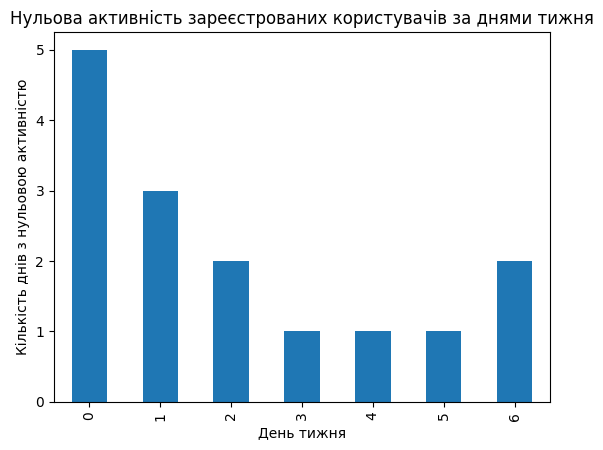

In [ ]:
zero_registered = df[df['registered'] == 0]
zero_by_day = zero_registered.groupby('dayofweek')['registered'].count()

zero_by_day.plot(kind='bar')
plt.xlabel('День тижня')
plt.ylabel('Кількість днів з нульовою активністю')
plt.title('Нульова активність зареєстрованих користувачів за днями тижня')
plt.show()


Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=1FXNzMa7rTdBQDwXSQfPTtPX5CHZK9A4X)

3. Проведемо аналіз загальної кількості зареєстрованих покристувачів за різними погодними умовами.
Згрупуйте всі дані за погодними умовами і визначте суму кількості зареєстрованих користувачів для кожної погодньої умови.
Побудуйте стовпачасту діаграму, які відобразить результат обчислень.
Зверніться до опису даних та дайте відповідь: чи побудована візуалізація має логічний сенс з точки зору опису даних.

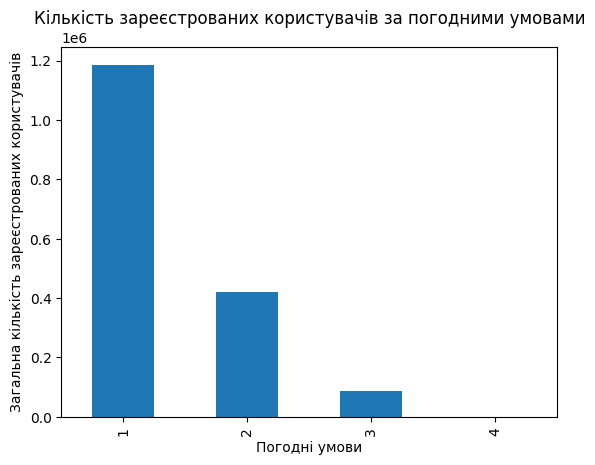

In [8]:
weather_group = df.groupby('weather')['registered'].sum()

weather_group.plot(kind='bar')
plt.xlabel('Погодні умови')
plt.ylabel('Загальна кількість зареєстрованих користувачів')
plt.title('Кількість зареєстрованих користувачів за погодними умовами')
plt.show()

Так, побудована візуалізація має логічний сенс з точки зору опису даних. З неї видно, що кращі погодні умови сприяють більшій активності користувачів, а погані погодні явища зменшують кількість реєстрацій.

4. Користуючись групою методів pandas.plot побудуйте діаграму розсіювання (scatter plot) між вологістю і кількістю зареєстрованих користувачів. Встановіть прозорість на 0.5, а також налаштуйте діаграму так, аби колір кожної точки відповідав значенню температури за відчуттями (`atemp`).

Проаналізуйте графік, що спостерігаєте?

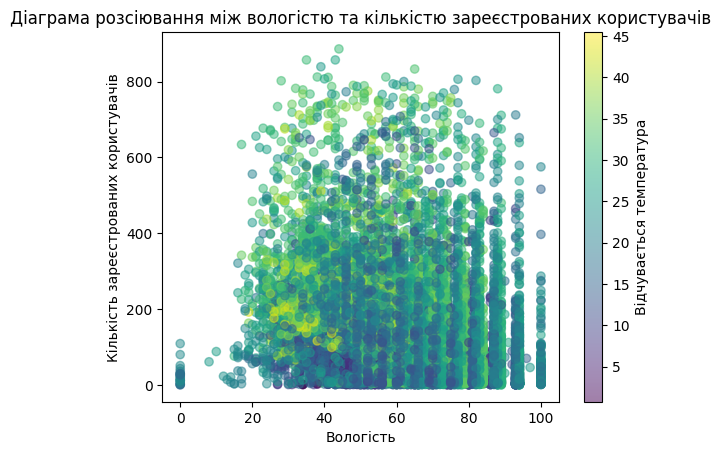

In [9]:
plt.scatter(df['humidity'], df['registered'], alpha=0.5, c=df['atemp'], cmap='viridis')

plt.xlabel('Вологість')
plt.ylabel('Кількість зареєстрованих користувачів')
plt.title('Діаграма розсіювання між вологістю та кількістю зареєстрованих користувачів')

plt.colorbar(label='Відчувається температура')

plt.show()

Реєстрації відбуваються як при низькій вологості (менше 20%), так і при високій (більше 80%).Значна кількість реєстрацій концентрується між 0 і 400 користувачами. Є кілька точок, де кількість зареєстрованих користувачів перевищує 600, але це відбувається рідко.Зазначено певну концентрацію даних при вологості в межах 40-80%, що може свідчити про середньостатистичну активність користувачів за цих умов.

Вологість і кількість реєстрацій: Вологість не має сильно вираженого впливу на кількість зареєстрованих користувачів, оскільки дані показують велику кількість реєстрацій при всіх рівнях вологості.

Температура за відчуттям також варіюється, але найбільша кількість користувачів реєструється при комфортних умовах (температура від 15 до 30°C), що може вказувати на залежність реєстрацій від більш сприятливих погодних умов.



Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=1trepX8z23YwyP9P8cAko9IzwOZkvLo8y)